In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('../../Consolidated_Data/JLDC/JLDC_power_data2024.csv')
df=df.set_index(df.columns[0],drop=True)

In [ ]:
df.index=pd.to_datetime(df.index)


In [8]:
df['RCPP EXP-JSPL']=df[['PP1-MW', 'PP2-MW', 'PH3-MW', 'PP3']].sum(axis=1)

In [11]:
power=df.copy()

In [22]:
def export(x):
    if x<0:
        return x
    else:
        return 0
def impor(x):
    if x>0:
        return x
    else:
        return 0
power['export']=power['Total Exp'].apply(export)
power['import']=power['Total Exp'].apply(impor)

# NSPL analysis

In [23]:
df=power.copy()

In [24]:
df['NSPL']=df['NSPL']*-1

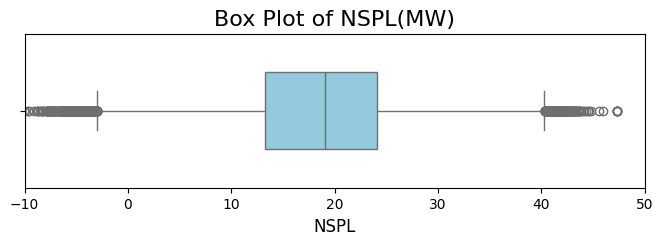

In [41]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['NSPL'], color='skyblue', width=0.5)
plt.title('Box Plot of NSPL(MW)', fontsize=16)
plt.xlabel('NSPL', fontsize=12)
plt.xlim(-10,50)
plt.show()


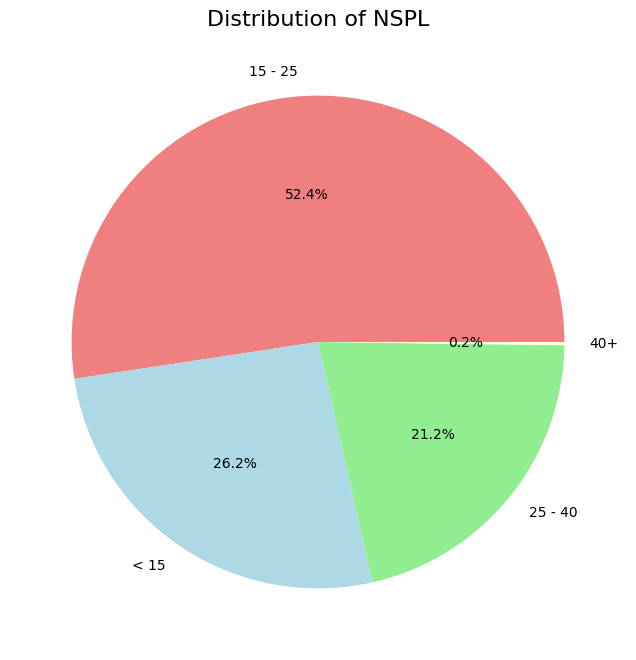

In [26]:
bins = [0, 15, 25, 40, float('inf')]
labels = ['< 15', '15 - 25', '25 - 40', '40+']
df['NSPL_Category'] = pd.cut(df['NSPL'], bins=bins, labels=labels)

category_counts = df['NSPL_Category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue', 'lightgreen', 'lightyellow'])
plt.title('Distribution of NSPL', fontsize=16)
plt.show()

# Mills all

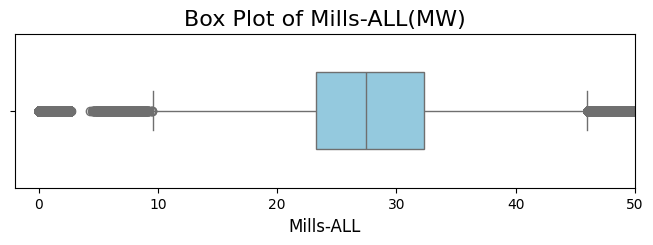

In [45]:

plt.figure(figsize=(8, 2))
sns.boxplot(x=df['Mills-ALL'], color='skyblue', width=0.5)
plt.title('Box Plot of Mills-ALL(MW)', fontsize=16)
plt.xlabel('Mills-ALL', fontsize=12)
plt.xlim(-2,50)
plt.show()

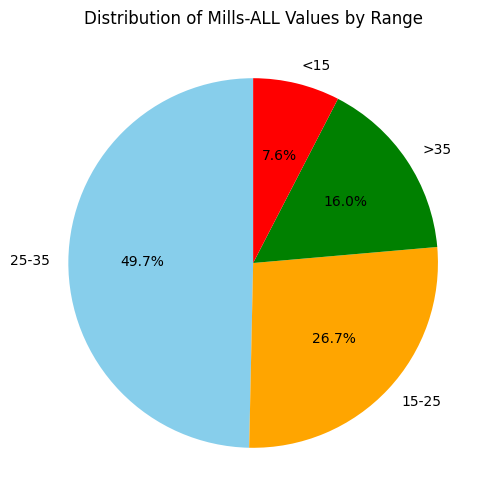

In [46]:
bins = [-float('inf'), 15, 25, 35, float('inf')]
labels = ['<15', '15-25', '25-35', '>35']
df['Mills-ALL Categories'] = pd.cut(df['Mills-ALL'], bins=bins, labels=labels)
category_counts = df['Mills-ALL Categories'].value_counts()

plt.figure(figsize=(6,6))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange', 'green', 'red'])
plt.title('Distribution of Mills-ALL Values by Range')
plt.ylabel('')
plt.show()

C:\Users\Himanshu Ranjan\AppData\Local\Temp\ipykernel_20616\637443705.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_means = df.groupby('Mills-ALL Categories')['export'].mean()


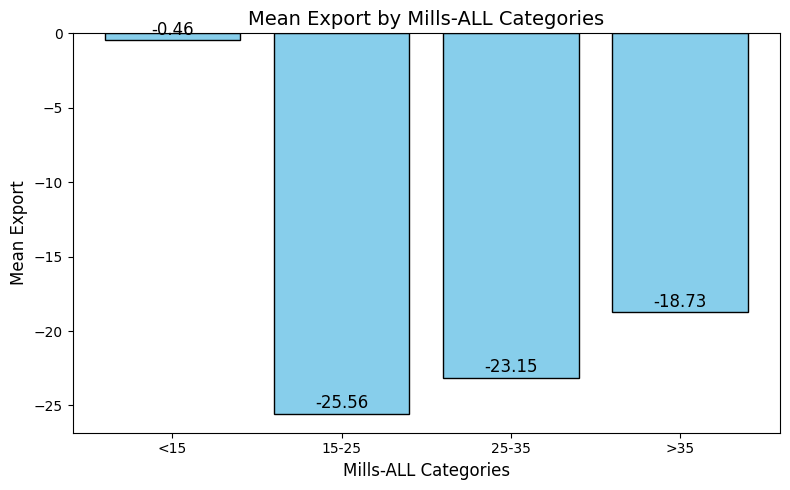

In [48]:
category_means = df.groupby('Mills-ALL Categories')['export'].mean()

plt.figure(figsize=(8,5))

bars = plt.bar(category_means.index, category_means.values, color='skyblue', edgecolor='black')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom', fontsize=12)

plt.title('Mean Export by Mills-ALL Categories', fontsize=14)
plt.xlabel('Mills-ALL Categories', fontsize=12)
plt.ylabel('Mean Export', fontsize=12)

plt.tight_layout()
plt.show()

In [53]:
# DCPP

In [51]:
df=power.copy()

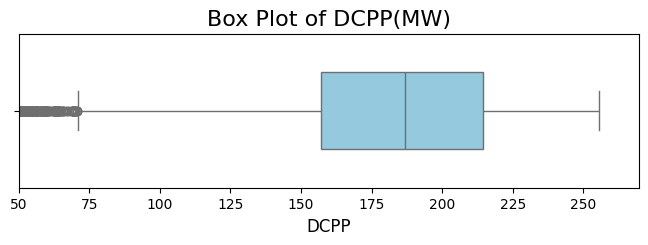

In [58]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['DCPP EXP-JSPL'], color='skyblue', width=0.5)
plt.title('Box Plot of DCPP(MW)', fontsize=16)
plt.xlabel('DCPP', fontsize=12)
plt.xlim(50,)
plt.show()

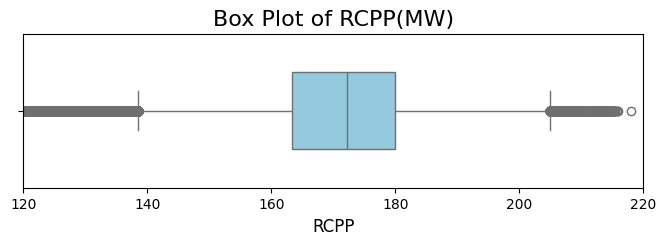

In [63]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['RCPP EXP-JSPL'], color='skyblue', width=0.5)
plt.title('Box Plot of RCPP(MW)', fontsize=16)
plt.xlabel('RCPP', fontsize=12)
plt.xlim(120,220)
plt.show()

In [64]:
# LRF

In [65]:
df=power.copy()

In [68]:
df['LRFs']=df[['LRF-01', 'LRF-02', 'LRF-03', 'LRF-04', 'LRF-05']].sum(axis=1)

In [76]:
df[['LRF-01', 'LRF-02', 'LRF-03', 'LRF-04', 'LRF-05']].describe()

,LRF-01,LRF-02,LRF-03,LRF-04,LRF-05
count,346482.000000,346482.000000,346482.000000,346482.000000,346482.000000
mean,6.156395,4.893707,4.433719,5.460009,2.454112
std,5.463722,5.798855,6.030503,6.344234,5.089866
min,-1.950000,-0.020000,-0.060000,-0.040000,-2.300000
25%,0.000000,0.000000,-0.010000,-0.010000,0.020000
50%,10.040000,0.010000,-0.010000,0.030000,0.020000
75%,10.890000,12.040000,12.460000,12.580000,0.040000
max,14.490000,13.960000,14.070000,17.800000,15.420000


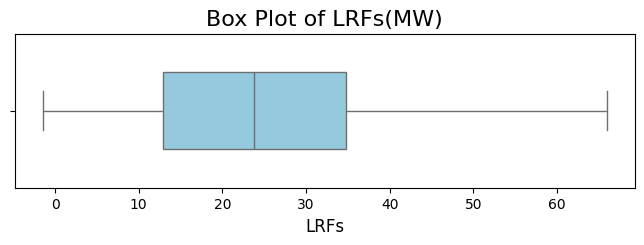

In [ ]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['LRFs'], color='skyblue', width=0.5)
plt.title('Box Plot of LRFs(MW)', fontsize=16)
plt.xlabel('LRFs', fontsize=12)
plt.show()

In [79]:
for i in ['LRF-01', 'LRF-02', 'LRF-03', 'LRF-04', 'LRF-05']:
    df[f'{i}_status']=df[i].apply(lambda x: 1 if x > 5 else 0)

In [83]:
df['Working_LRFs']=df[['LRF-01_status',
       'LRF-02_status', 'LRF-03_status', 'LRF-04_status', 'LRF-05_status']].sum(axis=1)

In [89]:
working_counts

Working_LRFs
2    124138
1    102177
3     83831
0     20779
4     14945
5       612
Name: count, dtype: int64

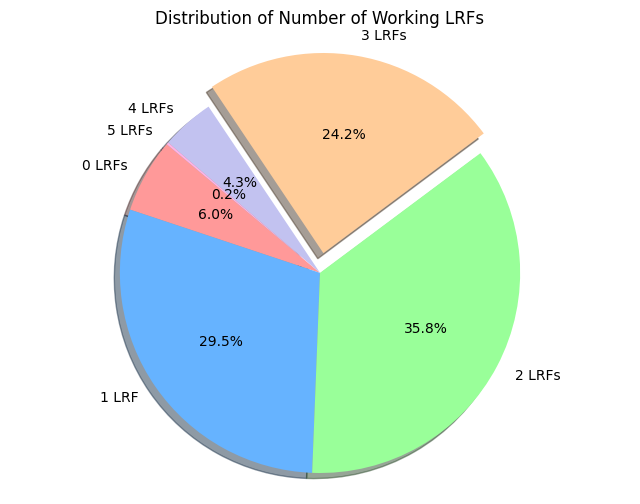

In [90]:
import matplotlib.pyplot as plt

# Data for the number of working LRFs
labels = ['0 LRFs', '1 LRF', '2 LRFs', '3 LRFs', '4 LRFs', '5 LRFs']
sizes = [20779, 102177, 124138, 83831, 14945, 612]
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']  # Define colors for each segment

# Exploding the slice where 3 LRFs are working
explode = (0, 0, 0, 0.1, 0, 0)  # Explode 3 LRFs slice slightly

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode, shadow=True)

# Title for the plot
plt.title('Distribution of Number of Working LRFs')

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()


C:\Users\Himanshu Ranjan\AppData\Local\Temp\ipykernel_20616\1740354445.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Working_LRFs', y='export', data=mean_export, palette='viridis')


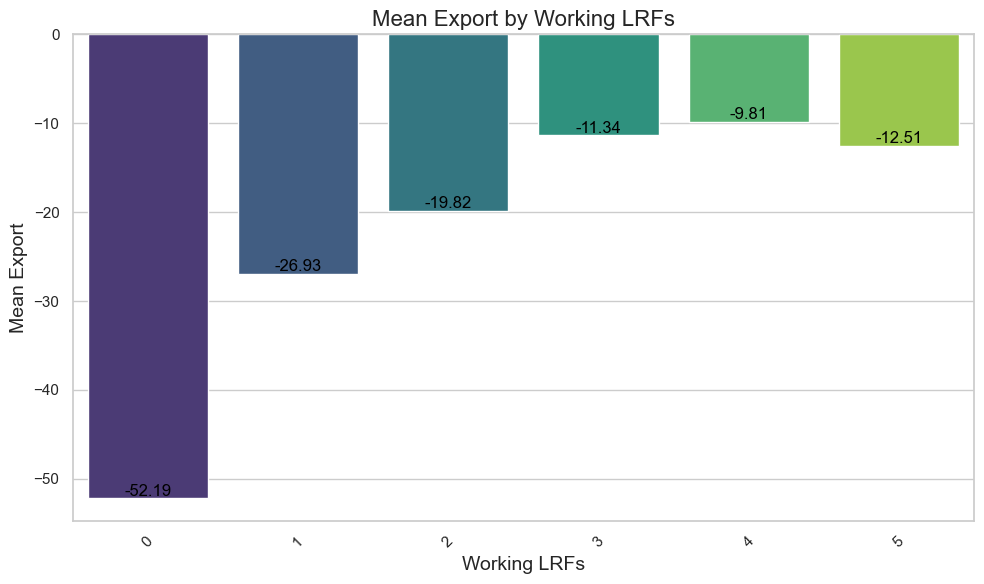

In [93]:
sns.set(style="whitegrid")
mean_export = df.groupby('Working_LRFs')['export'].mean().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Working_LRFs', y='export', data=mean_export, palette='viridis')

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.title('Mean Export by Working LRFs', fontsize=16)
plt.xlabel('Working LRFs', fontsize=14)
plt.ylabel('Mean Export', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


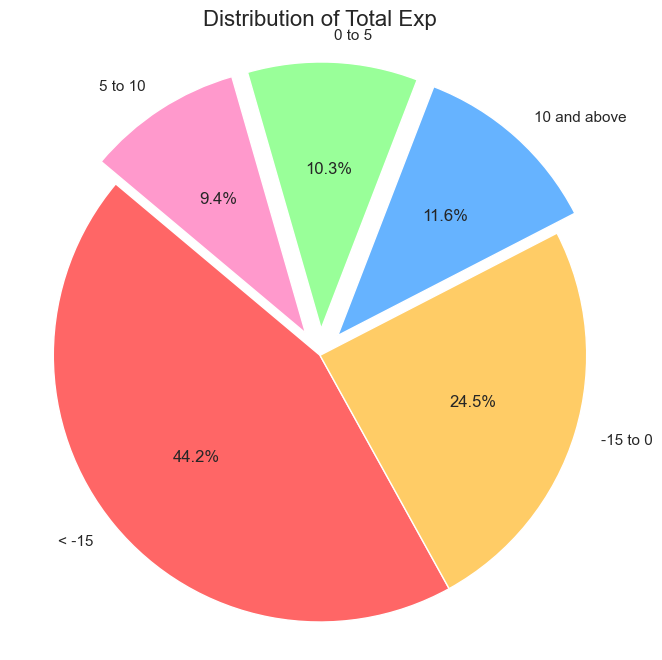

In [99]:

bins = [-float('inf'), -15, 0, 5, 10, float('inf')]
labels = ['< -15', '-15 to 0', '0 to 5', '5 to 10', '10 and above']

# Categorize the 'Total Exp' column
df['Category'] = pd.cut(df['Total Exp'], bins=bins, labels=labels)

# Count the number of occurrences in each category
category_counts = df['Category'].value_counts()

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
explode = (0, 0, 0.1, 0.1, 0.1)  # Exploding the slices for '0 to 5', '5 to 10', '10 and above'
ax.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, explode=explode, colors=['#ff6666', '#ffcc66', '#66b3ff', '#99ff99', '#ff99cc'])

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')  
plt.title('Distribution of Total Exp', fontsize=16)
plt.show()


In [103]:
# EAF

In [104]:
df=power.copy()

In [105]:
import pandas as pd
import numpy as np
from collections import deque
 
# Define buffer size
BUFFER_SIZE = 5
 
# Initialize buffers
buffer_EAF_2 = deque(maxlen=BUFFER_SIZE)
buffer_EAF_3 = deque(maxlen=BUFFER_SIZE)
 
def get_stage(gradient, second_order_gradient, power):
    if power <= 0:
        return 'Preparation Time'
    elif 0 < power <= 1 and gradient > 0:  # Add a condition for 'starting' when power is small but increasing
        return 'Ramping-Up'
    elif gradient > 5 and second_order_gradient > 0 and power < 70:
        return 'Ramping-Up'
    elif -5 < gradient < 5 and second_order_gradient == 0 and 58 < power < 70:
        return 'Melting'
    elif gradient < -5 and second_order_gradient < 0 and power > 0:
        return 'Ramping-Down'
    else:
        return 'Melting'
 
 
def get_status(power_EAF_2, power_EAF_3):
    # add new power values to the buffers
    buffer_EAF_2.append(power_EAF_2)
    buffer_EAF_3.append(power_EAF_3)
    # if buffers don't have enough values, return 'shutdown'
    if len(buffer_EAF_2) < 2 or len(buffer_EAF_3) < 2:
        return 'Preparation Time', 'Preparation Time'
    # calculate gradients and second order gradients
    gradient_EAF_2 = np.gradient(list(buffer_EAF_2))
    gradient_EAF_3 = np.gradient(list(buffer_EAF_3))
 
    gradient_EAF_2_smooth = np.mean(gradient_EAF_2)
    gradient_EAF_3_smooth = np.mean(gradient_EAF_3)
 
    second_order_gradient_EAF_2 = np.gradient(gradient_EAF_2)
    second_order_gradient_EAF_3 = np.gradient(gradient_EAF_3)
 
    second_order_gradient_EAF_2_smooth = np.mean(second_order_gradient_EAF_2)
    second_order_gradient_EAF_3_smooth = np.mean(second_order_gradient_EAF_3)
 
    # determine the status based on the gradients
    return get_stage(gradient_EAF_2_smooth, second_order_gradient_EAF_2_smooth, power_EAF_2), get_stage(gradient_EAF_3_smooth, second_order_gradient_EAF_3_smooth, power_EAF_3)
 
 
status_EAF_2 = []
status_EAF_3 = []
 
for index, row in df.iterrows():
    power_EAF_2 = row['EAF-2']
    power_EAF_3 = row['EAF-3']
 
    # Get the status of each EAF
    status_2, status_3 = get_status(power_EAF_2, power_EAF_3)
 
    # Append the status to the list
    status_EAF_2.append(status_2)
    status_EAF_3.append(status_3)
 
# Add the status columns to the dataframe
df['EAF-2 status'] = status_EAF_2
df['EAF-3 status'] = status_EAF_3

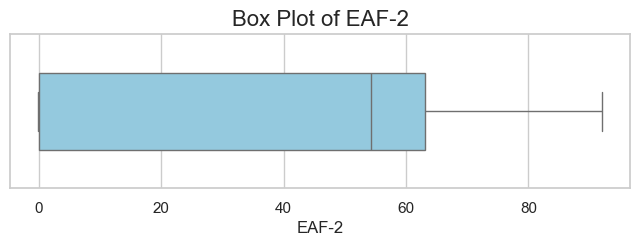

In [111]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['EAF-2'], color='skyblue', width=0.5)
plt.title('Box Plot of EAF-2', fontsize=16)
plt.xlabel('EAF-2', fontsize=12)
plt.show()

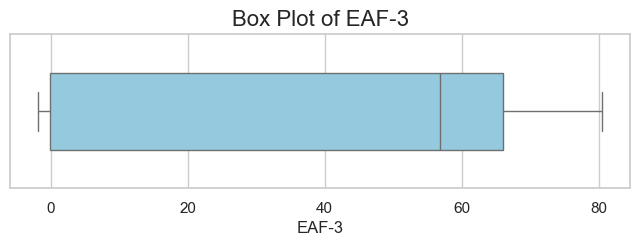

In [112]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['EAF-3'], color='skyblue', width=0.5)
plt.title('Box Plot of EAF-3', fontsize=16)
plt.xlabel('EAF-3', fontsize=12)
plt.show()

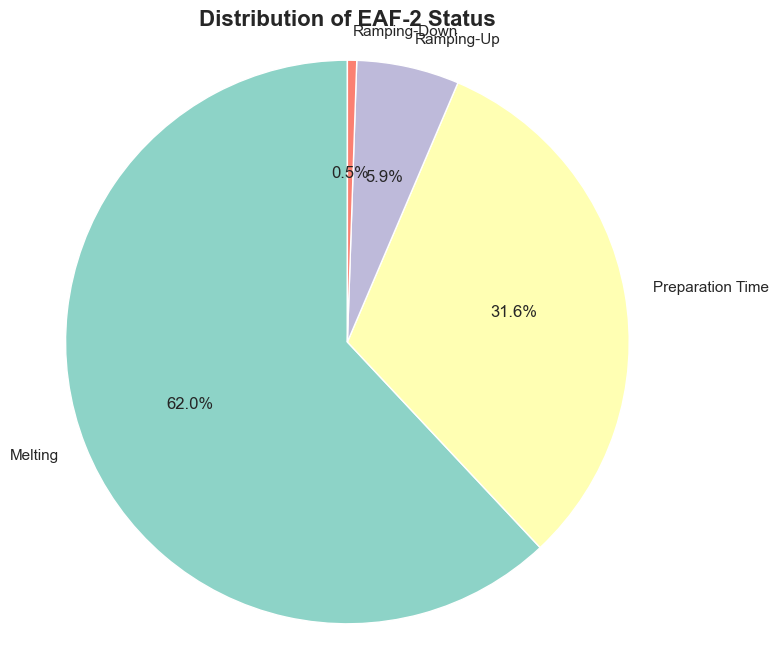

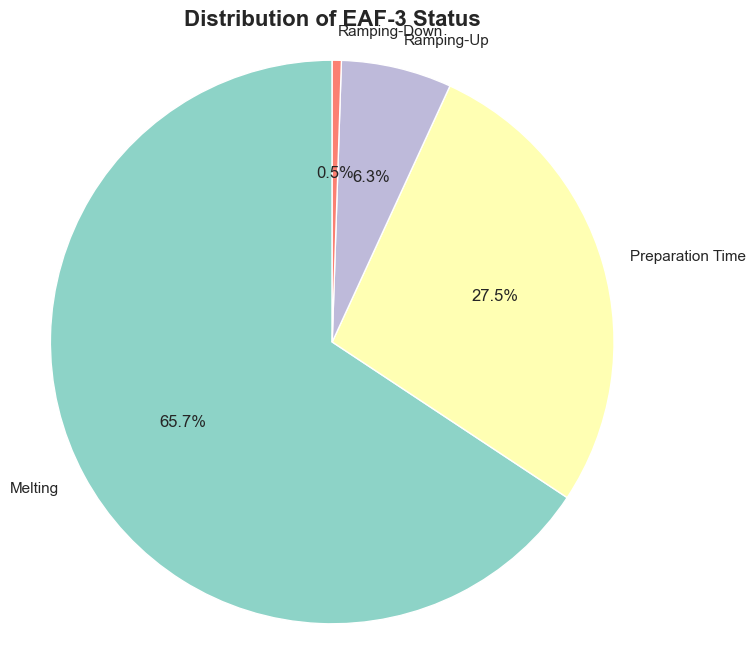

In [117]:
sns.set(style="whitegrid")

# Function to create a pie chart for a specific column
def plot_pie_chart(df, column, title):
    # Count the occurrences of each unique value
    value_counts = df[column].value_counts()
    
    # Create the pie chart
    fig, ax = plt.subplots(figsize=(8, 8))  # Set the figure size
    ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, 
           colors=sns.color_palette("Set3", len(value_counts)))  # Use a color palette
    ax.set_title(title, fontsize=16, fontweight='bold')  # Title with professional styling
    ax.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
    plt.show()

# Plot pie charts for 'EAF-2 status' and 'EAF-3 status'
plot_pie_chart(df, 'EAF-2 status', 'Distribution of EAF-2 Status')
plot_pie_chart(df, 'EAF-3 status', 'Distribution of EAF-3 Status')